In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
plt.style.use('fivethirtyeight')


In [ ]:
data = pd.read_csv('/content/stock-exchange-kse-100pakistan.csv', index_col='Date', parse_dates=['Date'])
#data[['Date']] = data[['Date']].astype('datetime64[ns]')
data.head()

,Open,High,Low,Close,Change,Volume
Date,,,,,,
2021-02-23,"31,722.16","31,800.90","31,597.31","31,626.19",-21.38,"718,191,025"
2021-02-22,"31,874.78","31,958.58","31,612.55","31,647.57",-203.61,"721,952,658"
2021-02-19,"31,748.75","31,904.30","31,749.43","31,851.18",91.36,"694,795,084"
2021-02-18,"32,049.85","32,104.67","31,745.72","31,759.82",-288.86,"577,837,595"
2021-02-17,"32,166.21","32,390.77","32,044.01","32,048.68",-93.15,"701,658,181"


In [ ]:
data.describe()

,Open,High,Low,Close,Change,Volume
count,3221,3221,3221,3221,3221,3221
unique,3213,3215,3211,3209,3104,3220
top,"29,269.00","6,641.69","6,639.00","6,639.25",0,"302,831,072"
freq,2,2,3,3,5,2


In [ ]:
df = data.copy()

In [ ]:
data.dtypes

Open      object
High      object
Low       object
Close     object
Change    object
Volume    object
dtype: object

In [ ]:
df['Close']= [float(str(i).replace(",", "")) for i in df['Close']]
df['Change']= [float(str(i).replace(",", "")) for i in df['Change']]
df['Volume']= [float(str(i).replace(",", "")) for i in df['Volume']]
df['Low']= [float(str(i).replace(",", "")) for i in df['Low']]
df['High']= [float(str(i).replace(",", "")) for i in df['High']]
df['Open']= [float(str(i).replace(",", "")) for i in df['Open']]

In [ ]:
df.head()

,Open,High,Low,Close,Change,Volume
Date,,,,,,
2021-02-23,31722.16,31800.90,31597.31,31626.19,-21.38,718191025.0
2021-02-22,31874.78,31958.58,31612.55,31647.57,-203.61,721952658.0
2021-02-19,31748.75,31904.30,31749.43,31851.18,91.36,694795084.0
2021-02-18,32049.85,32104.67,31745.72,31759.82,-288.86,577837595.0
2021-02-17,32166.21,32390.77,32044.01,32048.68,-93.15,701658181.0


In [ ]:
df['Close'].astype(float)
df['Change'].astype(float)
df['Volume'].astype(float)
df['Low'].astype(float)
df['High'].astype(float)
df['Open'].astype(float)

Date
2021-02-23    31722.16
2021-02-22    31874.78
2021-02-19    31748.75
2021-02-18    32049.85
2021-02-17    32166.21
                ...   
2008-02-28    10688.98
2008-02-27    10670.68
2008-02-26    10596.40
2008-02-25    10625.66
2008-02-22    10634.22
Name: Open, Length: 3221, dtype: float64

In [ ]:
data = df.copy()

In [ ]:
data.sort_values(by=['Date'], inplace=True, ascending=True)
data.head()

,Open,High,Low,Close,Change,Volume
Date,,,,,,
2008-02-22,10634.22,10635.42,10546.38,10607.29,0.00,313082688.0
2008-02-25,10625.66,10709.06,10579.49,10588.84,-18.45,273149184.0
2008-02-26,10596.40,10668.35,10578.01,10668.35,79.51,265668784.0
2008-02-27,10670.68,10732.92,10623.36,10664.36,-3.99,396419776.0
2008-02-28,10688.98,10724.21,10655.23,10704.15,39.79,325539584.0


In [ ]:
data.head()

,Open,High,Low,Close,Change,Volume
Date,,,,,,
2008-02-22,10634.22,10635.42,10546.38,10607.29,0.00,313082688.0
2008-02-25,10625.66,10709.06,10579.49,10588.84,-18.45,273149184.0
2008-02-26,10596.40,10668.35,10578.01,10668.35,79.51,265668784.0
2008-02-27,10670.68,10732.92,10623.36,10664.36,-3.99,396419776.0
2008-02-28,10688.98,10724.21,10655.23,10704.15,39.79,325539584.0


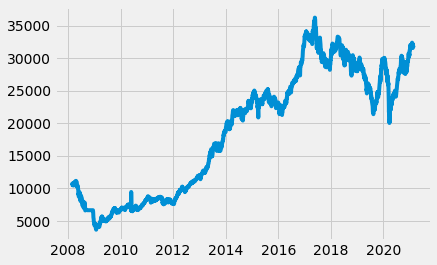

In [ ]:
plt.plot(data[['Close']])

In [ ]:
data = data['Close']

In [ ]:
data.head()

Date
2008-02-22    10607.29
2008-02-25    10588.84
2008-02-26    10668.35
2008-02-27    10664.36
2008-02-28    10704.15
Name: Close, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(np.array(data).reshape(-1,1))

In [ ]:
data

array([[0.21358728],
       [0.2130211 ],
       [0.21546103],
       ...,
       [0.86549831],
       [0.85925013],
       [0.85859404]])

In [ ]:
#data['High'] = data['High'] / 1000
#data['Open'] = data['Open'] / 1000
#data['Close'] = data['Close'] / 1000
#data['Low'] = data['Low'] / 1000
#data.head()

In [ ]:
data

array([[0.21358728],
       [0.2130211 ],
       [0.21546103],
       ...,
       [0.86549831],
       [0.85925013],
       [0.85859404]])

In [ ]:
train_size,test_size

(2093, 1128)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1992, 100)
(1992,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
#model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_52 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_53 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_54 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_55 (LSTM)              (None, 50)                20200     
                                                                 
 dense_37 (Dense)            (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
32/32 [==============================] - 16s 308ms/step - loss: 0.0189 - val_loss: 0.0016
Epoch 2/10
32/32 [==============================] - 8s 260ms/step - loss: 5.4810e-04 - val_loss: 0.0029
Epoch 3/10
32/32 [==============================] - 8s 254ms/step - loss: 2.9442e-04 - val_loss: 0.0026
Epoch 4/10
32/32 [==============================] - 8s 257ms/step - loss: 2.7962e-04 - val_loss: 0.0023
Epoch 5/10
32/32 [==============================] - 8s 260ms/step - loss: 2.5541e-04 - val_loss: 0.0026
Epoch 6/10
32/32 [==============================] - 8s 256ms/step - loss: 2.6323e-04 - val_loss: 0.0020
Epoch 7/10
32/32 [==============================] - 8s 254ms/step - loss: 2.6609e-04 - val_loss: 0.0019
Epoch 8/10
32/32 [==============================] - 8s 257ms/step - loss: 2.4545e-04 - val_loss: 0.0019
Epoch 9/10
32/32 [==============================] - 8s 254ms/step - loss: 2.4610e-04 - val_loss: 0.0024
Epoch 10/10
32/32 [==============================] - 8s 259ms/step 

In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.017131267878343202

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.038258051262139145

In [ ]:
import sklearn.metrics as sm
sm.r2_score(ytest, test_predict)

0.8477574144287404

In [ ]:
sm.mean_absolute_percentage_error(ytest, test_predict)

0.038931432160018264

In [ ]:
test_data

array([[0.6985617 ],
       [0.70080523],
       [0.70159695],
       ...,
       [0.86549831],
       [0.85925013],
       [0.85859404]])

In [ ]:
train_data

array([[0.21358728],
       [0.2130211 ],
       [0.21546103],
       ...,
       [0.6949121 ],
       [0.69409705],
       [0.69520945]])

In [ ]:
 pred = np.concatenate([train_predict, test_predict], axis=0)

In [ ]:
train_predict.shape

(1992, 1)

In [ ]:
data.shape

(3221, 1)

In [ ]:
pred.shape

(3019, 1)

In [ ]:
d = pd.read_csv('/content/stock-exchange-kse-100pakistan.csv', parse_dates=['Date'],index_col=['Date'])
d = pd.DataFrame(d)
d.sort_values(by=['Date'], inplace=True, ascending=True)
d = d[['Close']]
d.head()

,Close
Date,
2008-02-22,"10,607.29"
2008-02-25,"10,588.84"
2008-02-26,"10,668.35"
2008-02-27,"10,664.36"
2008-02-28,"10,704.15"


In [ ]:
a = d.iloc[101:2093,]
b = d.iloc[2093:,]

In [ ]:
a

,Close
Date,
2008-12-18,"5,683.75"
2008-12-19,"5,503.21"
2008-12-22,"5,300.29"
2008-12-23,"5,097.14"
2008-12-24,"4,920.50"
...,...
2016-12-29,"32,641.93"
2016-12-30,"32,842.43"
2017-01-02,"33,145.71"


In [ ]:
d = pd.concat([a,b],axis = 0)

In [ ]:
d.shape

(3019, 1)

In [ ]:
d['pred'] = pred

In [ ]:
d.head()

,Close,pred
Date,,
2008-12-18,"5,683.75",0.163298
2008-12-19,"5,503.21",0.162374
2008-12-22,"5,300.29",0.161247
2008-12-23,"5,097.14",0.159875
2008-12-24,"4,920.50",0.158249


In [ ]:
d['Close']= [float(str(i).replace(",", "")) for i in d['Close']]
d['Close'].astype(float)


Date
2008-12-18     5683.75
2008-12-19     5503.21
2008-12-22     5300.29
2008-12-23     5097.14
2008-12-24     4920.50
                ...   
2021-02-17    32048.68
2021-02-18    31759.82
2021-02-19    31851.18
2021-02-22    31647.57
2021-02-23    31626.19
Name: Close, Length: 3019, dtype: float64

In [ ]:
d

,Close,pred
Date,,
2008-12-18,5683.75,0.163298
2008-12-19,5503.21,0.162374
2008-12-22,5300.29,0.161247
2008-12-23,5097.14,0.159875
2008-12-24,4920.50,0.158249
...,...,...
2021-02-17,32048.68,0.845035
2021-02-18,31759.82,0.845356
2021-02-19,31851.18,0.845576


In [ ]:
original_close = d[['Close']]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
original_close = scaler.fit_transform(original_close)


In [ ]:
original_close

array([[0.06249866],
       [0.05695843],
       [0.05073142],
       ...,
       [0.86549831],
       [0.85925013],
       [0.85859404]])

In [ ]:
d['scaled_close'] = original_close

In [ ]:
train_p = d.iloc[:2093,]
test_p = d.iloc[2093:]

In [ ]:
train_p

,Close,pred,scaled_close
Date,,,
2008-12-18,5683.75,0.163298,0.062499
2008-12-19,5503.21,0.162374,0.056958
2008-12-22,5300.29,0.161247,0.050731
2008-12-23,5097.14,0.159875,0.044497
2008-12-24,4920.50,0.158249,0.039077
...,...,...,...
2017-05-23,35863.66,0.893801,0.988629
2017-05-24,36234.20,0.896338,1.000000
2017-05-25,36224.38,0.898813,0.999699


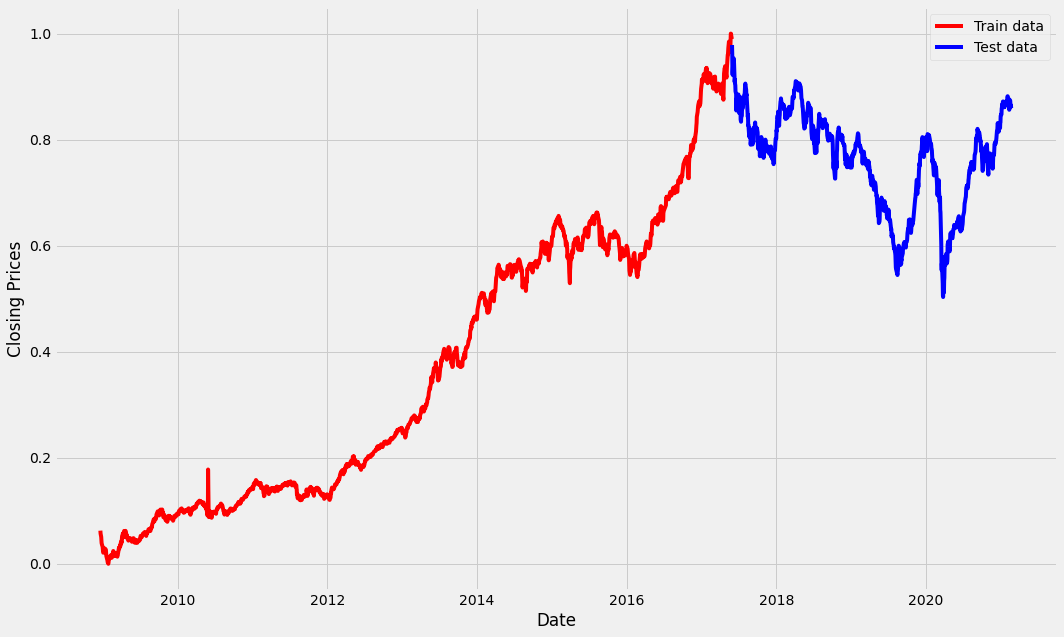

In [ ]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.plot(train_p['scaled_close'], 'red', label='Train data')
plt.plot(test_p['scaled_close'], 'blue', label='Test data')

plt.legend()

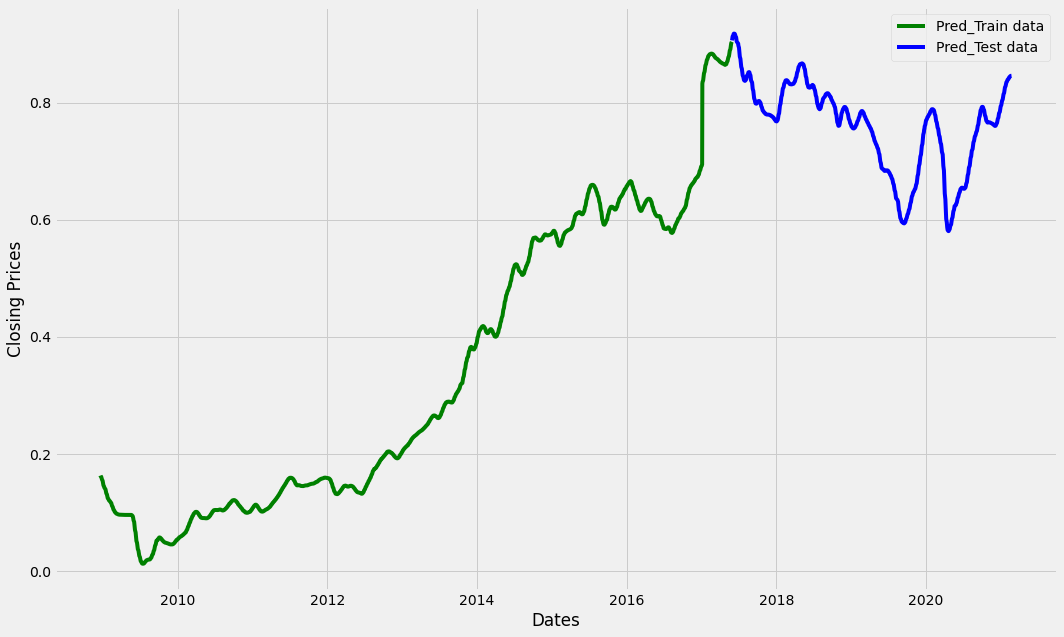

In [ ]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_p['pred'], 'green', label='Pred_Train data')
plt.plot(test_p['pred'], 'blue', label='Pred_Test data')
plt.legend()

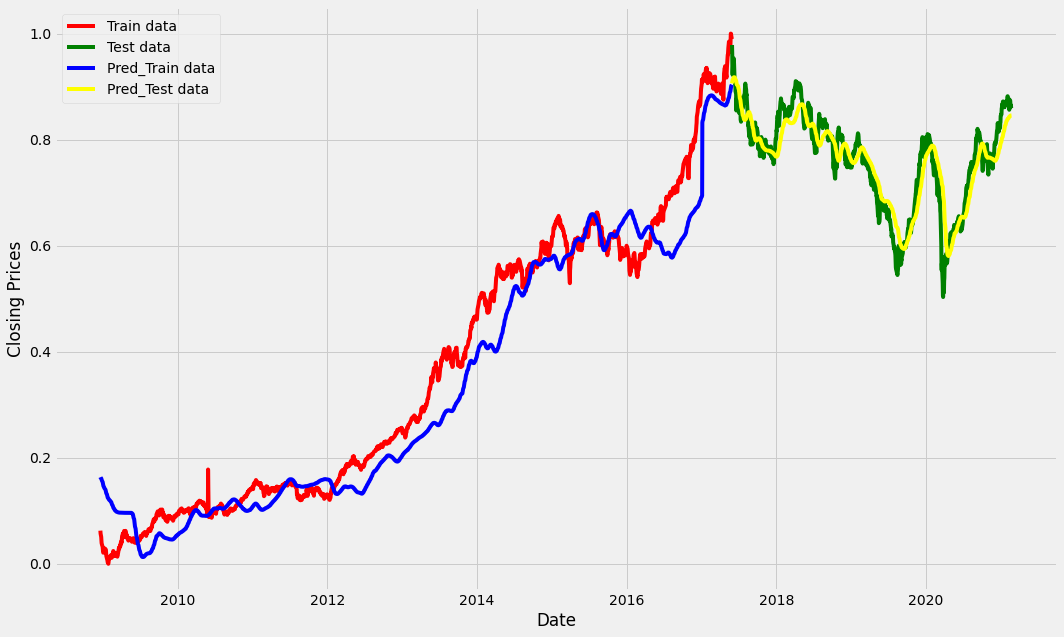

In [ ]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.plot(train_p['scaled_close'], 'red', label='Train data')
plt.plot(test_p['scaled_close'], 'green', label='Test data')
plt.plot(train_p['pred'], 'blue', label='Pred_Train data')
plt.plot(test_p['pred'], 'yellow', label='Pred_Test data')
plt.legend()

In [ ]:
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers import Conv1D, Conv2D, MaxPooling2D
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
import csv
import collections
from scipy.stats import zscore
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
X_train.shape

(1992, 100, 1)

In [ ]:
cnn = Sequential()
cnn.add(Conv1D(8, kernel_size = (1),  padding = 'valid', 
               activation = 'relu', input_shape = (100,1)))
#cnn.add(MaxPooling2D(pool_size = (1)))

cnn.add(Flatten())
cnn.add(Dense(64, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation="relu"))
cnn.summary()  

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 100, 8)            16        
                                                                 
 flatten_13 (Flatten)        (None, 800)               0         
                                                                 
 dense_38 (Dense)            (None, 64)                51264     
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_39 (Dense)            (None, 1)                 65        
                                                                 
Total params: 51,345
Trainable params: 51,345
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn.compile(loss='mean_squared_error', optimizer='adam')



In [ ]:
%%time
cnn.fit(X_train,y_train,validation_data=(X_test,ytest),batch_size = 30,verbose=1,epochs = 10)

Epoch 1/10
67/67 [==============================] - 1s 5ms/step - loss: 0.0181 - val_loss: 0.0034
Epoch 2/10
67/67 [==============================] - 0s 3ms/step - loss: 0.0118 - val_loss: 0.0081
Epoch 3/10
67/67 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.0286
Epoch 4/10
67/67 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.0021
Epoch 5/10
67/67 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0064
Epoch 6/10
67/67 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0080
Epoch 7/10
67/67 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.0022
Epoch 8/10
67/67 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.0024
Epoch 9/10
67/67 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0015
Epoch 10/10
67/67 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.0032
CPU times: user 3.1

In [ ]:
X_test.shape

(1027, 100, 1)

In [ ]:
pred = cnn.predict(X_test)
train_predict=cnn.predict(X_train)

In [ ]:
score = np.sqrt(metrics.mean_squared_error(ytest, pred))
print("TEST RMSE Score: {}".format(score))

TEST RMSE Score: 0.05679761726361722


In [ ]:
score = np.sqrt(metrics.mean_squared_error(y_train, train_predict))
print("TRAIN RMSE Score: {}".format(score))

TRAIN RMSE Score: 0.023780936966928738


In [ ]:
import sklearn.metrics as sm
sm.r2_score(ytest, pred)

0.6644550590443036

In [ ]:
import sklearn.metrics as sm
sm.r2_score(y_train, train_predict)

0.9881038501624942

In [ ]:
sm.mean_absolute_percentage_error(ytest, pred)

0.06053831867426095

In [ ]:
sm.mean_absolute_percentage_error(y_train, train_predict)

167972105335.45905

In [ ]:
pred

array([[0.7892006 ],
       [0.7910659 ],
       [0.7946449 ],
       ...,
       [0.79728824],
       [0.7998149 ],
       [0.800483  ]], dtype=float32)

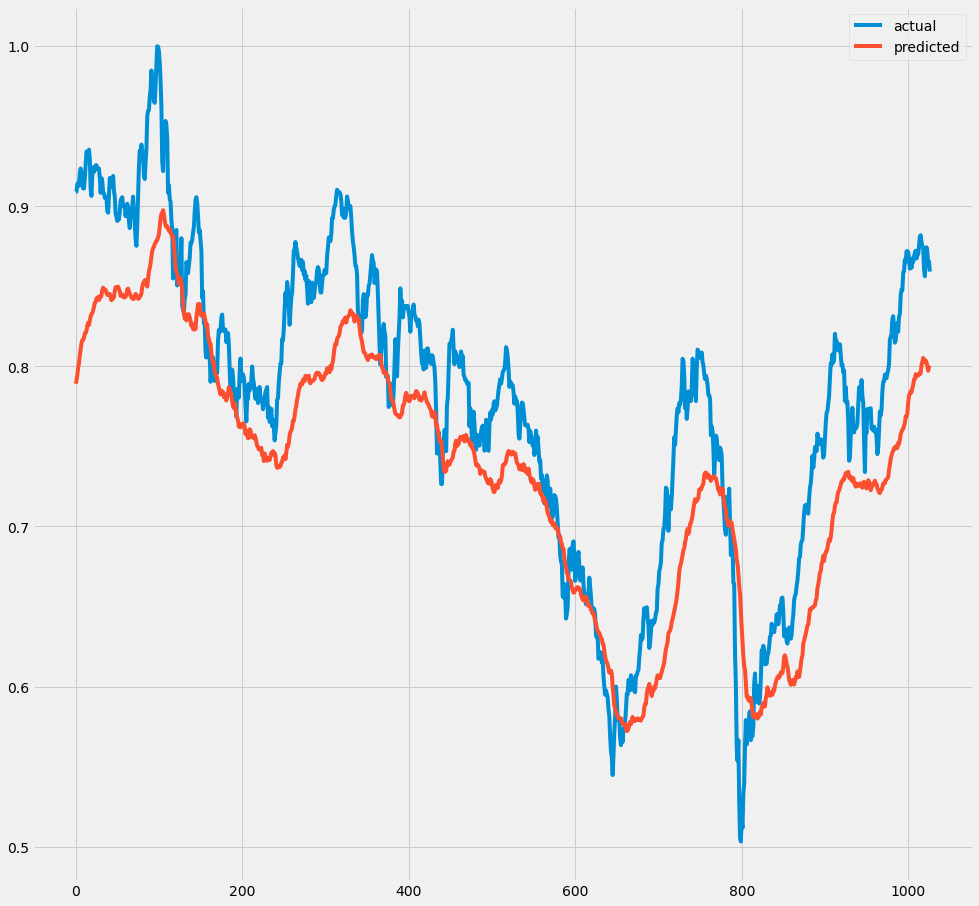

In [ ]:
plt.figure(figsize=(15,15))

plt.plot(ytest, label = 'actual')
plt.plot(pred,   label = 'predicted')
plt.legend()
plt.show()

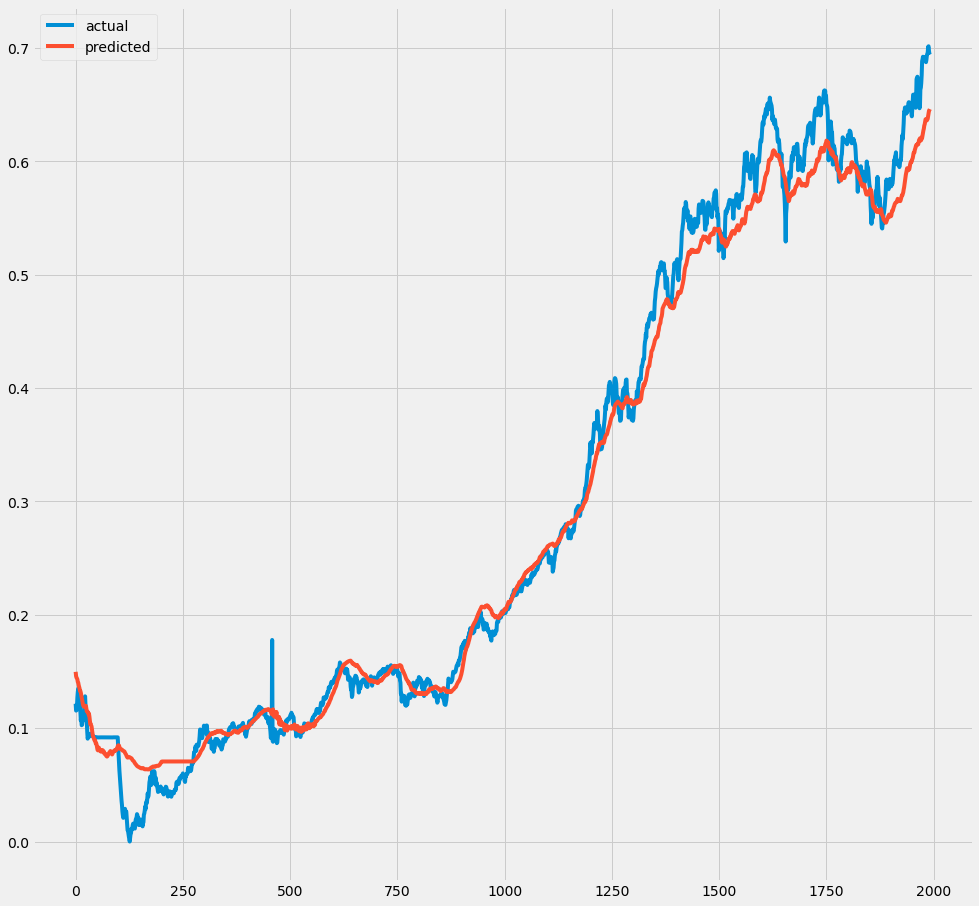

In [ ]:
plt.figure(figsize=(15,15))

plt.plot(y_train, label = 'actual')
plt.plot(train_predict,   label = 'predicted')
plt.legend()
plt.show()

In [ ]:
len(test_data)

1128

In [ ]:
fut_inp = test_data[1028:]

In [ ]:
fut_inp = fut_inp.reshape(1, -1)

In [ ]:
tmp_inp = list(fut_inp)

In [ ]:
fut_inp.shape

(1, 100)

In [ ]:
tmp_inp = tmp_inp[0].tolist()


In [ ]:
lst_output=[]
n_steps=100
i=0
while(i<100):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.8129231929779053], [0.8119515776634216], [0.8109962940216064], [0.8100565671920776], [0.8091326355934143], [0.8082239031791687], [0.8073299527168274], [0.8064510226249695], [0.8055864572525024], [0.8047361373901367], [0.8038995862007141], [0.8030770421028137], [0.8022679686546326], [0.8014717698097229], [0.8006889224052429], [0.7999182939529419], [0.7991605997085571], [0.7984150052070618], [0.7976813912391663], [0.796959400177002], [0.7962492108345032], [0.7955499887466431], [0.7948623895645142], [0.7941852807998657], [0.7935190200805664], [0.7928631901741028], [0.7922175526618958], [0.7915824055671692], [0.790956974029541], [0.7903413772583008], [0.7897352576255798], [0.7891383767127991], [0.7885507941246033], [0.7879725098609924], [0.7874029874801636], [0.7868425250053406], [0.7862900495529175], [0.7857463359832764], [0.7852108478546143], [0.7846837639808655], [0.7841643691062927], [0.7836531400680542], [0.7831493616104126], [0.7826533913612366], [0.7821648120880127], [0.78168350

In [ ]:
ds_new= np.array(ytest)
lst_output = np.array(lst_output)

In [ ]:
len(ds_new)

1027

In [ ]:
lst_output = lst_output.reshape(1,-1)

In [ ]:
ytest

array([0.90882159, 0.90912907, 0.9138383 , ..., 0.86269475, 0.86549831,
       0.85925013])

In [ ]:
lst_output = lst_output.flatten()

In [ ]:
lst_output

array([0.81292319, 0.81195158, 0.81099629, 0.81005657, 0.80913264,
       0.8082239 , 0.80732995, 0.80645102, 0.80558646, 0.80473614,
       0.80389959, 0.80307704, 0.80226797, 0.80147177, 0.80068892,
       0.79991829, 0.7991606 , 0.79841501, 0.79768139, 0.7969594 ,
       0.79624921, 0.79554999, 0.79486239, 0.79418528, 0.79351902,
       0.79286319, 0.79221755, 0.79158241, 0.79095697, 0.79034138,
       0.78973526, 0.78913838, 0.78855079, 0.78797251, 0.78740299,
       0.78684253, 0.78629005, 0.78574634, 0.78521085, 0.78468376,
       0.78416437, 0.78365314, 0.78314936, 0.78265339, 0.78216481,
       0.7816835 , 0.78120959, 0.78074282, 0.78028268, 0.7798295 ,
       0.77938324, 0.7789436 , 0.77851045, 0.77808362, 0.77766299,
       0.77724898, 0.77684069, 0.77643853, 0.77604216, 0.77565157,
       0.77526706, 0.77488762, 0.77451402, 0.77414572, 0.77378285,
       0.77342546, 0.7730729 , 0.77272552, 0.77238315, 0.77204591,
       0.77171332, 0.77138567, 0.77106243, 0.77074409, 0.77043

In [ ]:
ds_new = np.concatenate((ytest,lst_output))


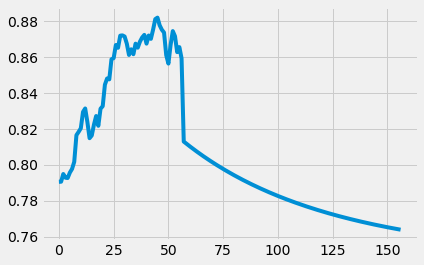

In [ ]:
plt.plot(ds_new[970:])
